# Skin Detection
### Bianchi Luca (4805748)

## Intro
Context
Teoria

## Obiettivi
- Individuare segmenti di pelle nelle immagini
- Comprendere le criticità del task
- Definire alcuni possibili ambiti applicativi

## Metodo/i

## Analisi esperimenti
- Pollicione
- Jacobs
- manSweatingCloseup
- gioconda
- BC

## Conclusioni

## Fonti


In [41]:
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2 as cv


In [42]:
outputs = []
FILE_DIR = './material/images'

## Metodi
### Normalized RGB

In [43]:
def normalized(rgb):

        norm=np.zeros_like(rgb,np.float32)

        r = rgb[:, :, 0]
        g = rgb[:, :, 1]
        b = rgb[:, :, 2]
        sum = rgb.sum(axis=2)

        norm[:,:,0]=r/sum
        norm[:,:,1]=g/sum
        norm[:,:,2]=b/sum
        return norm

In [44]:
def run_skin_analysis_norm():
    with os.scandir(FILE_DIR+"/skin/") as direct:
        mx = [0, 0]
        mn = [1000, 1000]
        for file in direct:
            plt.figure(figsize=(32, 8))
            plt.suptitle(file.name)
            skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
            skin_img_array = normalized(np.asarray(skin_img))
            plt.subplot(1, 9, 1)
            plt.imshow(skin_img_array)
            plt.subplot(1, 9, 2)
            plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 1], norm=True)
            plt.subplot(1, 9, 3)
            plt.scatter(skin_img_array[:, :, 0], skin_img_array[:, :, 2], norm=True)
            plt.subplot(1, 9, 4)
            plt.scatter(skin_img_array[:, :, 1], skin_img_array[:, :, 2], norm=True)
            plt.subplot(1, 9, 5)
            plt.imshow(skin_img)
            plt.subplot(1, 9, (6, 7))
            tmp_mx = (skin_img_array[:, :, 0]/skin_img_array[:, :, 1]).max(axis=1)
            tmp_mn = (skin_img_array[:, :, 0]/skin_img_array[:, :, 1]).min(axis=1)
            plt.plot(tmp_mx)
            plt.plot(tmp_mn)
            if tmp_mx.min() > mx[0]:
                mx[0] = tmp_mx.max()
            if tmp_mn.min() < mn[0]:
                mn[0] = tmp_mn.min()
            plt.subplot(1, 9, (8, 9))
            tmp_mx = (skin_img_array[:, :, 0]/skin_img_array[:, :, 2]).max(axis=1)
            tmp_mn = (skin_img_array[:, :, 0]/skin_img_array[:, :, 2]).min(axis=1)
            plt.plot(tmp_mx)
            plt.plot(tmp_mn)
            if tmp_mx.min() > mx[1]:
                mx[1] = tmp_mx.max()
            if tmp_mn.min() < mn[1]:
                mn[1] = tmp_mn.min()
        print(f"Massimi = {mx}, Minimi = {mn}")

In [45]:
def norm_analysis(img):
    img_array = np.asarray(img)
    img_array_norm = normalized(img_array)
    fig = plt.figure(figsize=(32, 8))
    plt.suptitle("Analisi immagine normalizzata")
    ax = plt.subplot(1, 4, 1)
    ax.title.set_text("Immagine normalizzata")
    plt.imshow(img_array_norm)
    plt.colorbar(orientation="vertical")
    mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
    mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1.01, 100)
    mask_norm = mask_rg & mask_rb
    ax = plt.subplot(1, 4, 2)
    ax.title.set_text("Maschera su R'/G'")
    plt.imshow(mask_rg, cmap='gray')
    ax = plt.subplot(1, 4, 3)
    ax.title.set_text("Maschera su R'/B'")
    plt.imshow(mask_rb, cmap='gray')
    ax = plt.subplot(1, 4, 4)
    ax.title.set_text("Maschera combinata")
    plt.imshow(mask_norm, cmap='gray')
    return mask_norm

## HSV

In [46]:
def run_skin_analysis_hsv():
    with os.scandir(FILE_DIR+"/skin/") as direct:
        mx = [0, 0]
        mn = [1000, 1000]
        for file in direct:
            plt.figure(figsize=(32, 4))
            plt.suptitle(file.name)
            skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
            skin_img_hsb = cv.cvtColor(skin_img, cv.COLOR_BGR2HSV)
            plt.figure(figsize=(32, 8))
            plt.subplot(1, 7, 1)
            plt.imshow(skin_img_hsb[:, :, 0], cmap="hsv")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, 2)
            plt.imshow(skin_img_hsb[:, :, 1], cmap="Reds")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, 3)
            plt.imshow(skin_img_hsb[:, :, 2], cmap="gray")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, (4, 5))
            tmp_mx = (skin_img_hsb[:, :, 0]).max(axis=1)
            tmp_mn = (skin_img_hsb[:, :, 0]).min(axis=1)
            plt.plot(tmp_mx)
            plt.plot(tmp_mn)
            if tmp_mx.max() > mx[0]:
                mx[0] = tmp_mx.max()
            if tmp_mn.min() < mn[0]:
                mn[0] = tmp_mn.min()
            plt.subplot(1, 7, (6, 7))
            tmp_mx = (skin_img_hsb[:, :, 1]).max(axis=1)
            tmp_mn = (skin_img_hsb[:, :, 1]).min(axis=1)
            plt.plot(tmp_mx)
            plt.plot(tmp_mn)
            if tmp_mx.max() > mx[1]:
                mx[1] = tmp_mx.max()
            if tmp_mn.min() < mn[1]:
                mn[1] = tmp_mn.min()
        print(f"Massimi = {mx}, Minimi = {mn}")

In [47]:
def hsv_analysis(img):
    img_hsb = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    label = ["H", "S", "V"]
    cmaps = ["hsv", "Reds", "gray"]

    plt.figure(figsize=(32, 8))
    plt.suptitle("Analisi spazio HSV")
    ax = plt.subplot(1, 5, 1)
    ax.title.set_text("Immagine HSV")
    plt.imshow(img_hsb, cmap='hsv')

    for elem in range(img_hsb.shape[2]):
        plt.subplot(1, 5, elem + 2)
        plt.imshow(img_hsb[:, :, elem], cmap=cmaps[elem])
        plt.colorbar(orientation='vertical')
        plt.title(label[elem])
    mask_hsv = cv.inRange(img_hsb[:,:,0], 50, 160) & cv.inRange(img_hsb[:, :, 1], 40, 200)
    ax = plt.subplot(1, 5, 5)
    ax.title.set_text("Maschera")
    plt.imshow(mask_hsv, cmap="gray")
    return mask_hsv

## YCrCb

In [48]:

def run_skin_analysis_ycbcr():    
    with os.scandir(FILE_DIR+"/skin/") as direct:
        mx = [0, 0]
        mn = [1000, 1000]
        for file in direct:
            plt.figure(figsize=(32, 4))
            plt.suptitle(file.name)
            skin_img = io.imread(FILE_DIR + "/skin/" + file.name)
            skin_img_ycbcr = cv.cvtColor(skin_img, cv.COLOR_RGB2YCrCb)
            plt.subplot(1, 2, 1)
            plt.imshow(skin_img_ycbcr)
            plt.subplot(1, 2, 2)
            plt.imshow(skin_img)
            plt.figure(figsize=(32, 8))
            plt.subplot(1, 7, 1)
            plt.imshow(skin_img_ycbcr[:, :, 0], cmap="gray")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, 2)
            plt.imshow(skin_img_ycbcr[:, :, 1], cmap="Greens")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, 3)
            plt.imshow(skin_img_ycbcr[:, :, 2], cmap="Reds")
            plt.colorbar(orientation='horizontal')
            plt.subplot(1, 7, (4, 5))
            tmp_mx = (skin_img_ycbcr[:, :, 1]).max(axis=1)
            tmp_mn = (skin_img_ycbcr[:, :, 1]).min(axis=1)
            plt.plot(tmp_mn)
            plt.plot(tmp_mx)
            if tmp_mx.max() > mx[0] :
                mx[0] = tmp_mx.max()
            if tmp_mn.min() < mn[0] :
                mn[0] = tmp_mn.min()
            plt.subplot(1, 7, (6, 7))
            tmp_mx = (skin_img_ycbcr[:, :, 2]).max(axis=1)
            tmp_mn = (skin_img_ycbcr[:, :, 2]).min(axis=1)
            plt.plot(tmp_mn)
            plt.plot(tmp_mx)
            if tmp_mx.max() > mx[1] :
                mx[1] = tmp_mx.max()
            if tmp_mn.min() < mn[1] :
                mn[1] = tmp_mn.min()
        print(f"Massimi = {mx}, Minimi = {mn}")


In [49]:
def ycbcr_analysis(img):
    img_ycbcr = cv.cvtColor(img, cv.COLOR_RGB2YCrCb)
    plt.figure(figsize=(32, 8))
    plt.suptitle("Analisi spazio YCbCr")
    ax = plt.subplot(1, 5, 1)
    ax.title.set_text("Immagine in ycbcr")
    plt.imshow(img_ycbcr)
    ax = plt.subplot(1, 5, 2)
    ax.title.set_text("Luminanza")
    plt.imshow(img_ycbcr[:, : , 0], cmap='gray')
    plt.colorbar(orientation='vertical')
    ax = plt.subplot(1, 5, 3)
    ax.title.set_text("Crominanza blu")
    plt.imshow(img_ycbcr[:, :, 1], cmap='Blues')
    plt.colorbar(orientation='vertical')
    ax = plt.subplot(1, 5, 4)
    ax.title.set_text("Crominanza rosso")
    plt.imshow(img_ycbcr[:, :, 2], cmap='Reds')
    plt.colorbar(orientation='vertical')
    mask_ycrcb = cv.inRange(img_ycbcr[:, :, 1], 127, 187) & cv.inRange(img_ycbcr[:, :, 2], 73, 127)
    ax = plt.subplot(1, 5, 5)
    ax.title.set_text("Maschera")
    plt.imshow(mask_ycrcb, cmap="gray")
    return mask_ycrcb

## Combinato

In [50]:
def plot_masked(img, mask):
    plt.figure(figsize=(32, 8))
    plt.suptitle("Immagine mascherata")
    plt.imshow(cv.bitwise_or(img, img, mask=mask))

In [51]:
def run_analysis(img_name):
    img = np.asarray(plt.imread(FILE_DIR + img_name)).astype('uint8')
    plt.figure(figsize=(32, 8))
    plt.suptitle("Immagine originale")
    plt.imshow(img)

    mask = norm_analysis(img) & hsv_analysis(img) & ycbcr_analysis(img)
    plot_masked(img, mask)

## Analisi esperimenti

Cominciamo con l'analisi di un esperimento basilare, usando l'immagine di una mano su sfondo bianco

<ipython-input-45-aeab4922a2cb>:10: RuntimeWarning: divide by zero encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
<ipython-input-45-aeab4922a2cb>:11: RuntimeWarning: divide by zero encountered in true_divide
  mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1.01, 100)
<ipython-input-45-aeab4922a2cb>:11: RuntimeWarning: invalid value encountered in true_divide
  mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1.01, 100)


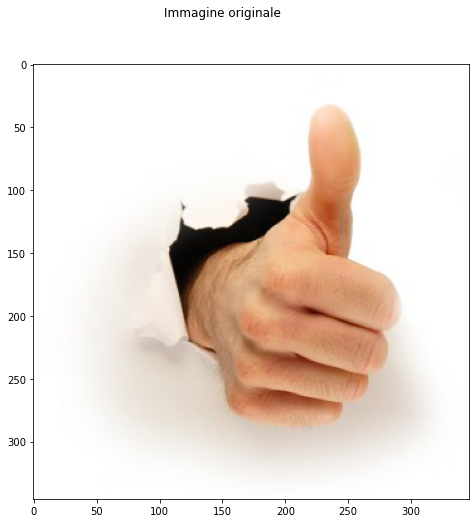

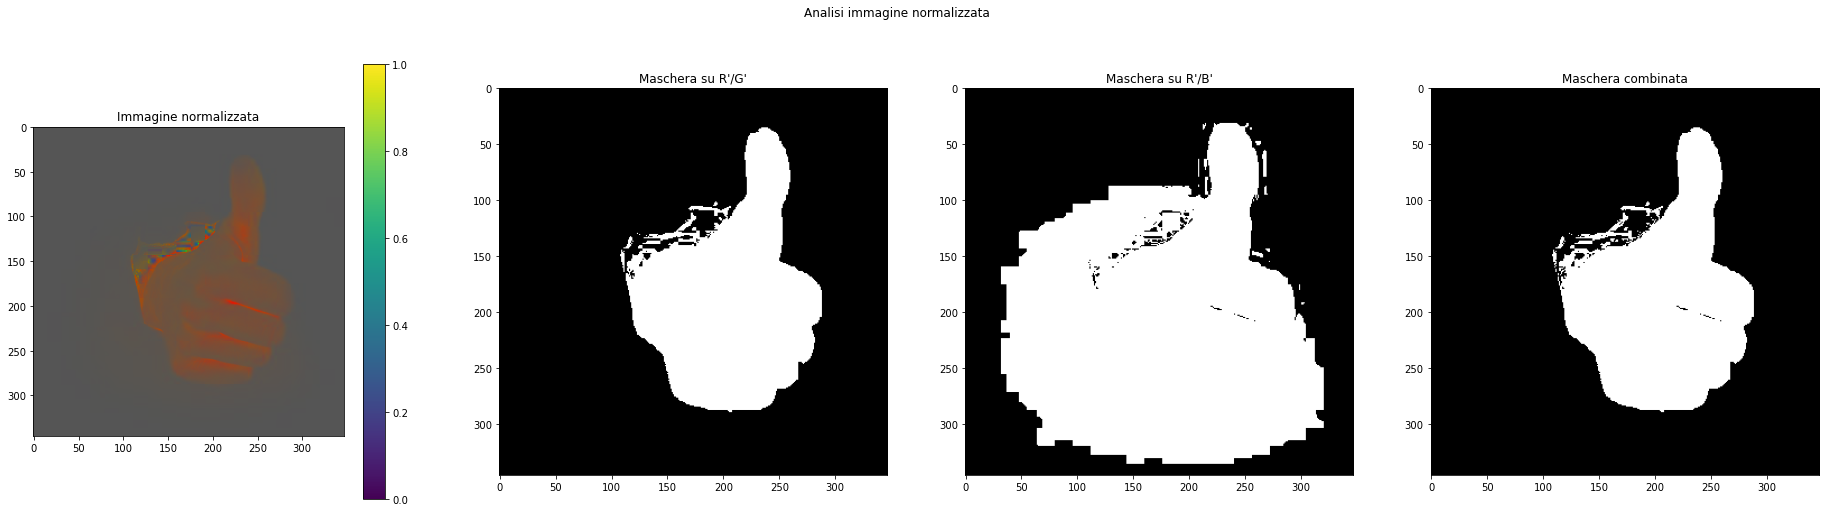

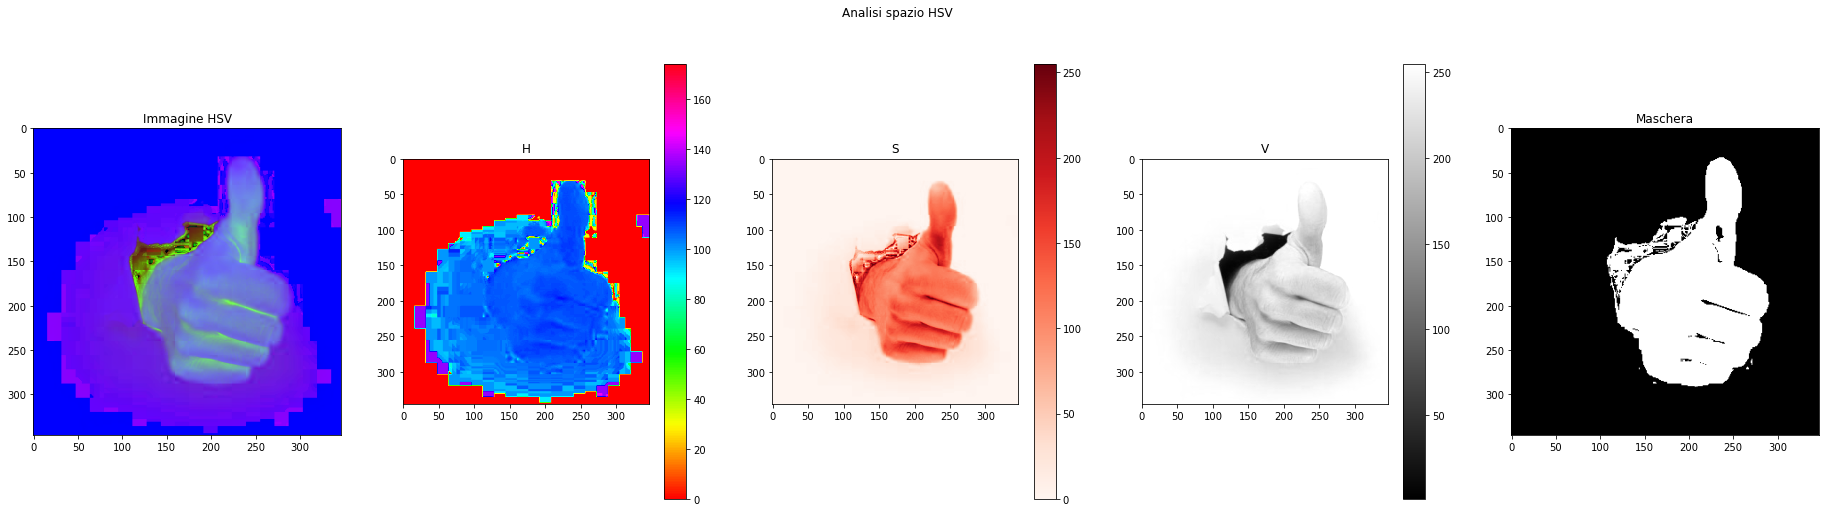

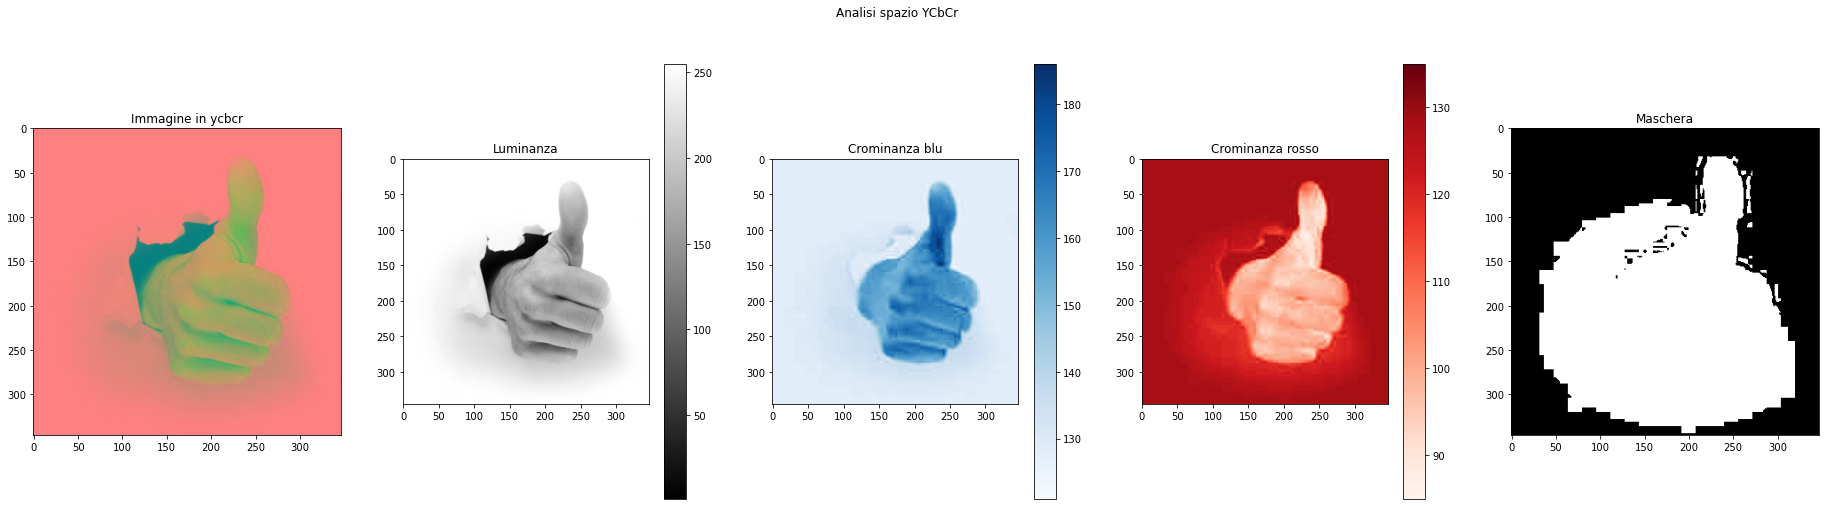

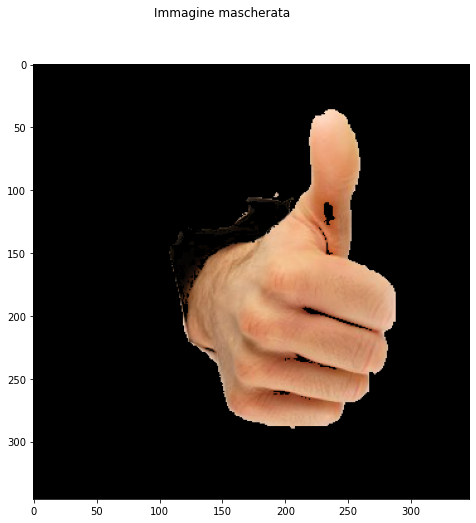

In [52]:
run_analysis("/pollicione.jpg")

Vediamo come, nonostante delle imperfezioni, dovute da una parte ad una saturazione troppo alta per i valori di soglia usati, e dall'altra ad un leggero riflesso dei colori della mano sul background che vanno a ingannare l'algoritmo, il risultato è quasi perfetto.
Ma passiamo ad un caso un po' più complesso, andando ad analizzare una foto catturata su una pista di atletica leggera.

<ipython-input-45-aeab4922a2cb>:10: RuntimeWarning: divide by zero encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
<ipython-input-45-aeab4922a2cb>:10: RuntimeWarning: invalid value encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
<ipython-input-45-aeab4922a2cb>:11: RuntimeWarning: divide by zero encountered in true_divide
  mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1.01, 100)


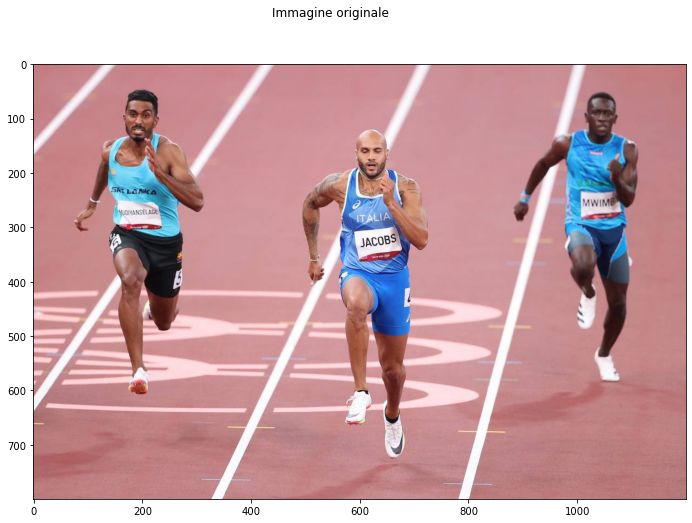

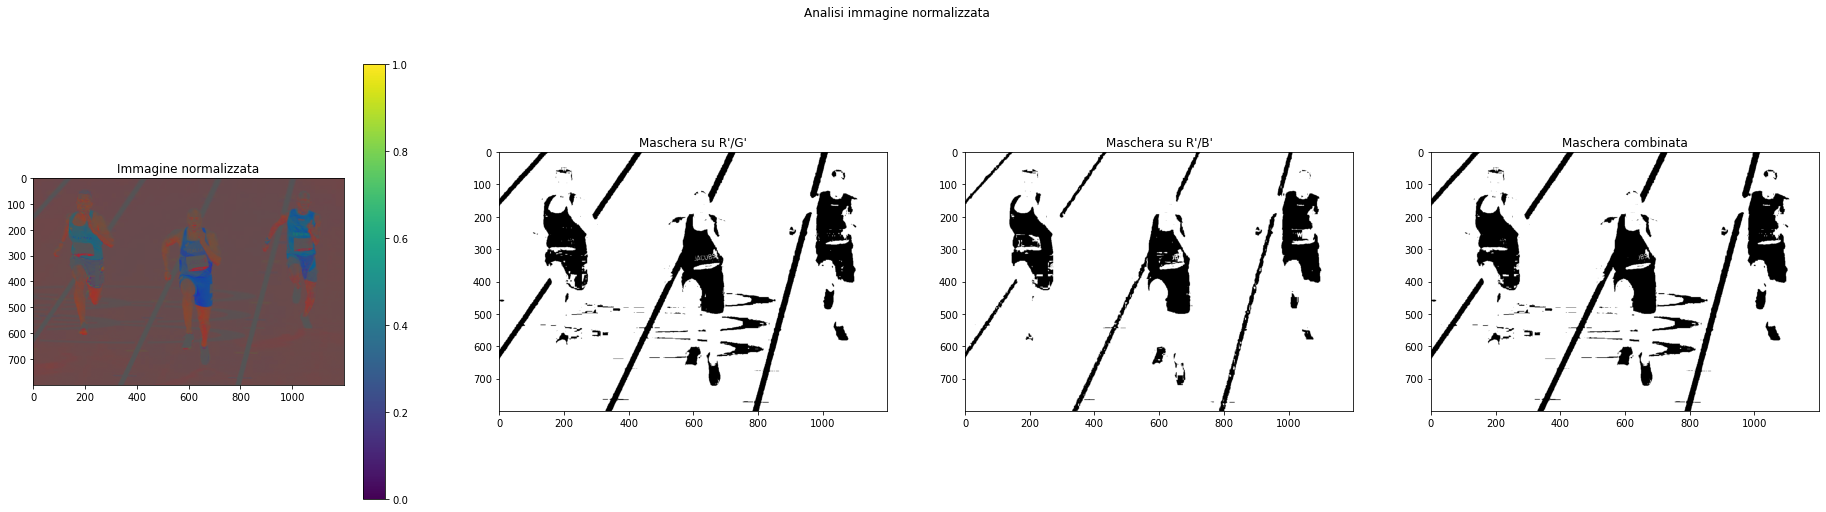

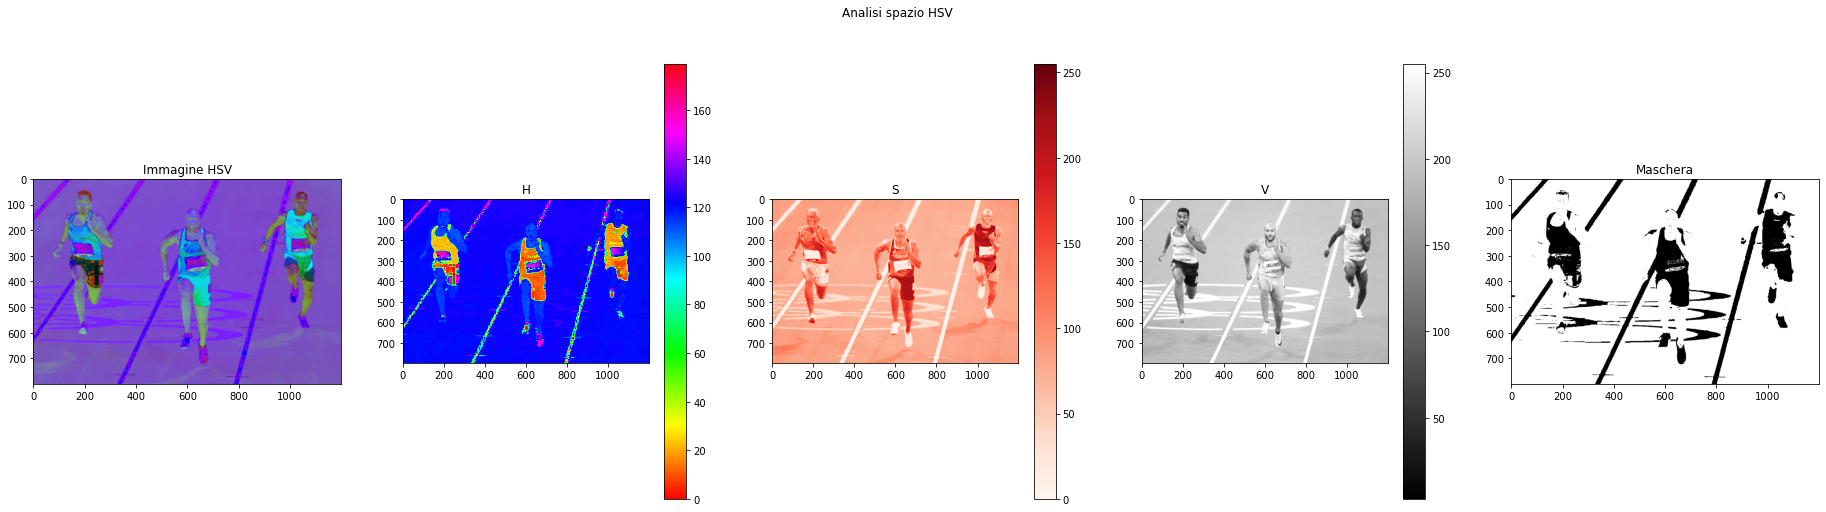

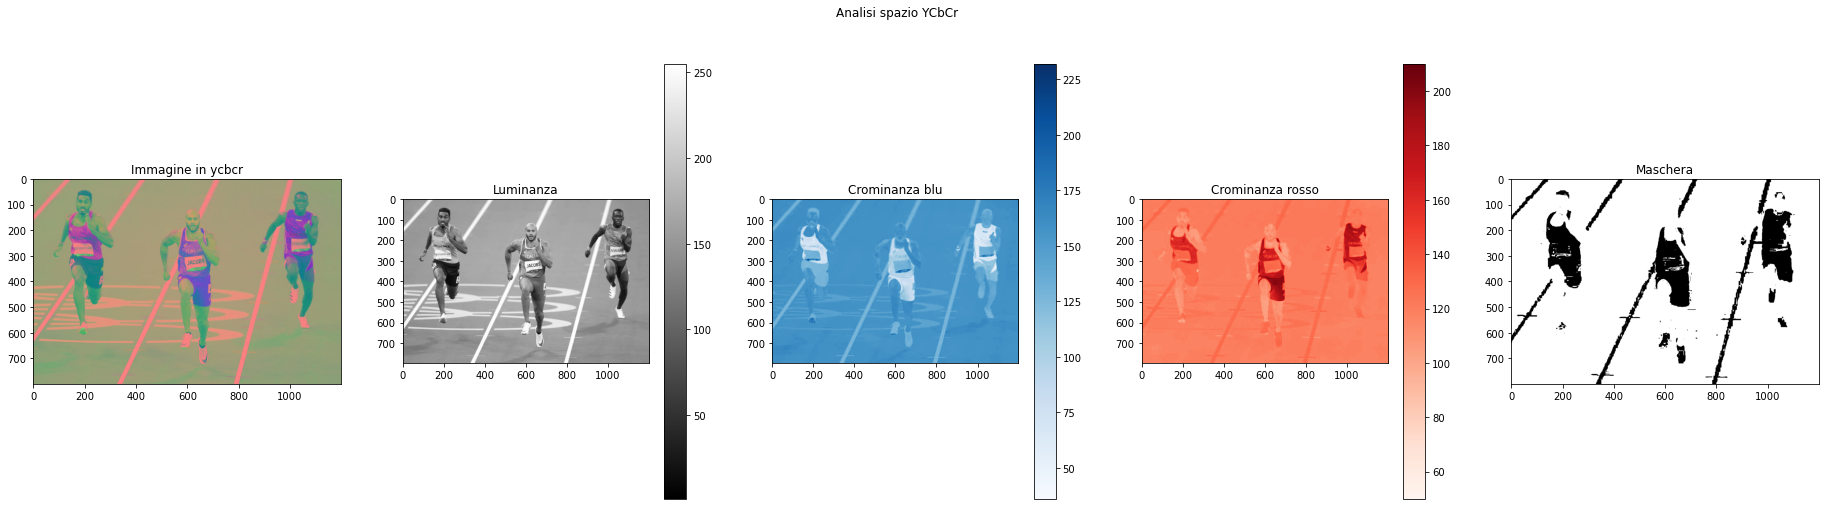

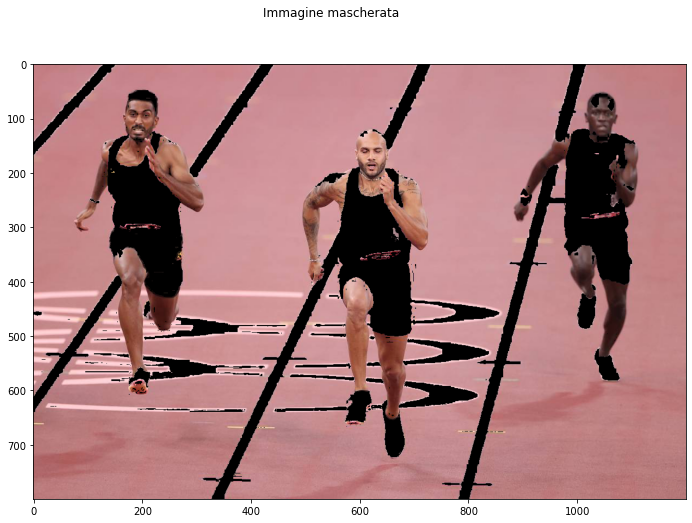

In [53]:
run_analysis("/jacobs.jpg")

Con le soglie impostate l'algoritmo rileva correttamente tutti i lembi di pelle presenti nella foto.
Ma, purtroppo, abbiamo uno sfondo che "emula" tutte le caratteristiche della pelle prese in considerazione e viene quindi inclusa come pelle.
Il problema non sarebbe nemmeno risolvibile modificando le soglie per le caratteristiche prese in analisi, dato che i valori legati al background non si trovano agli estremi del range di sogliatura, bensì nel mezzo. Vanno quindi considerate tecniche alternative per ottenere un risultato più corretto.

Proviamo ora ad analizzare un'immagine con problemi di illuminazione

<ipython-input-43-7ade38f1b7b3>:10: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,0]=r/sum
<ipython-input-43-7ade38f1b7b3>:11: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,1]=g/sum
<ipython-input-43-7ade38f1b7b3>:12: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,2]=b/sum
<ipython-input-45-aeab4922a2cb>:10: RuntimeWarning: divide by zero encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
<ipython-input-45-aeab4922a2cb>:11: RuntimeWarning: divide by zero encountered in true_divide
  mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1.01, 100)


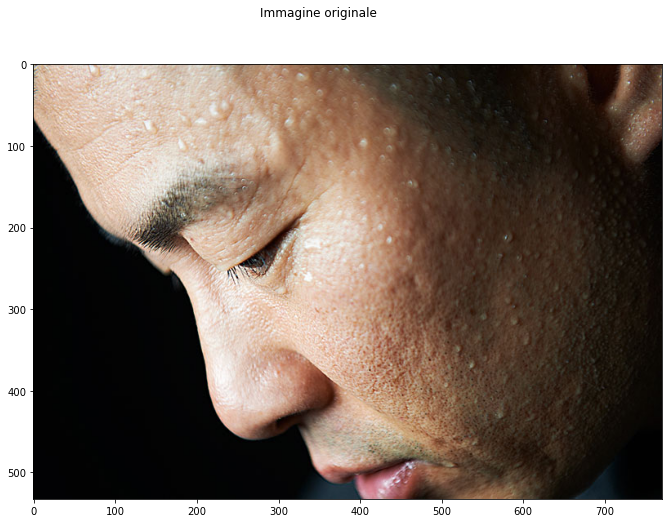

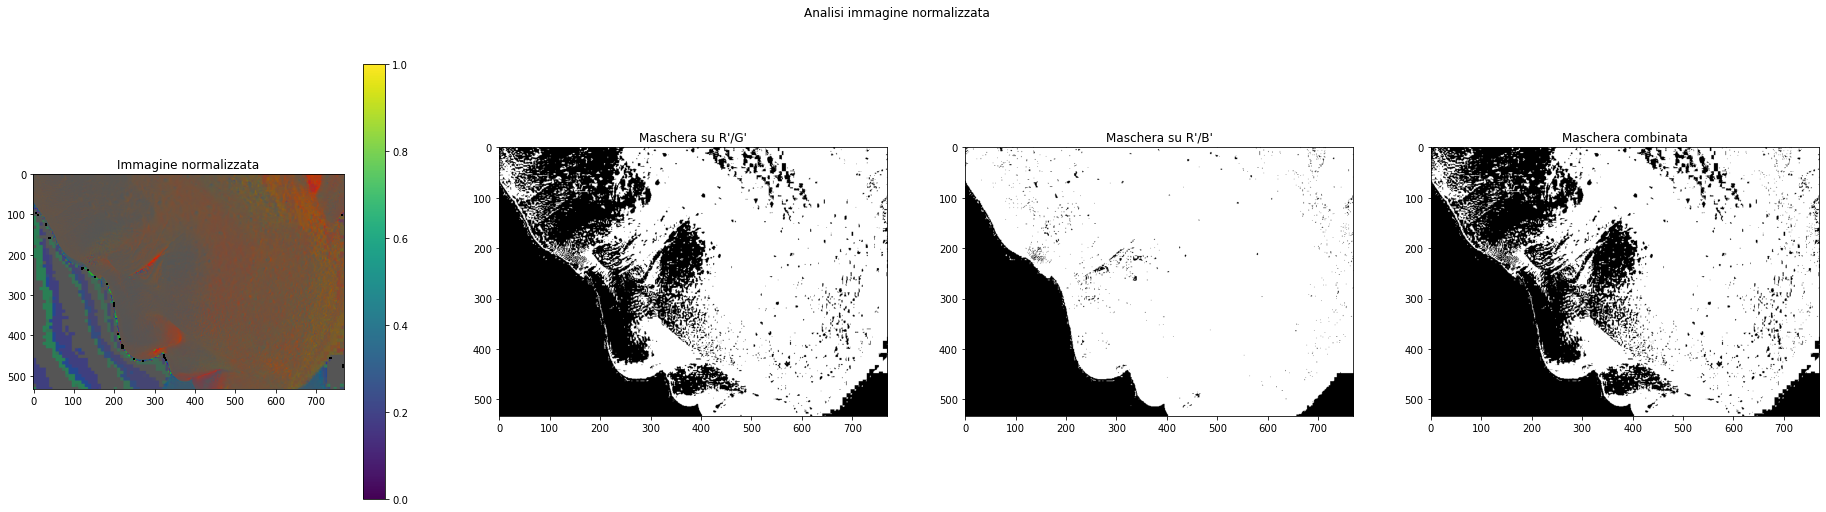

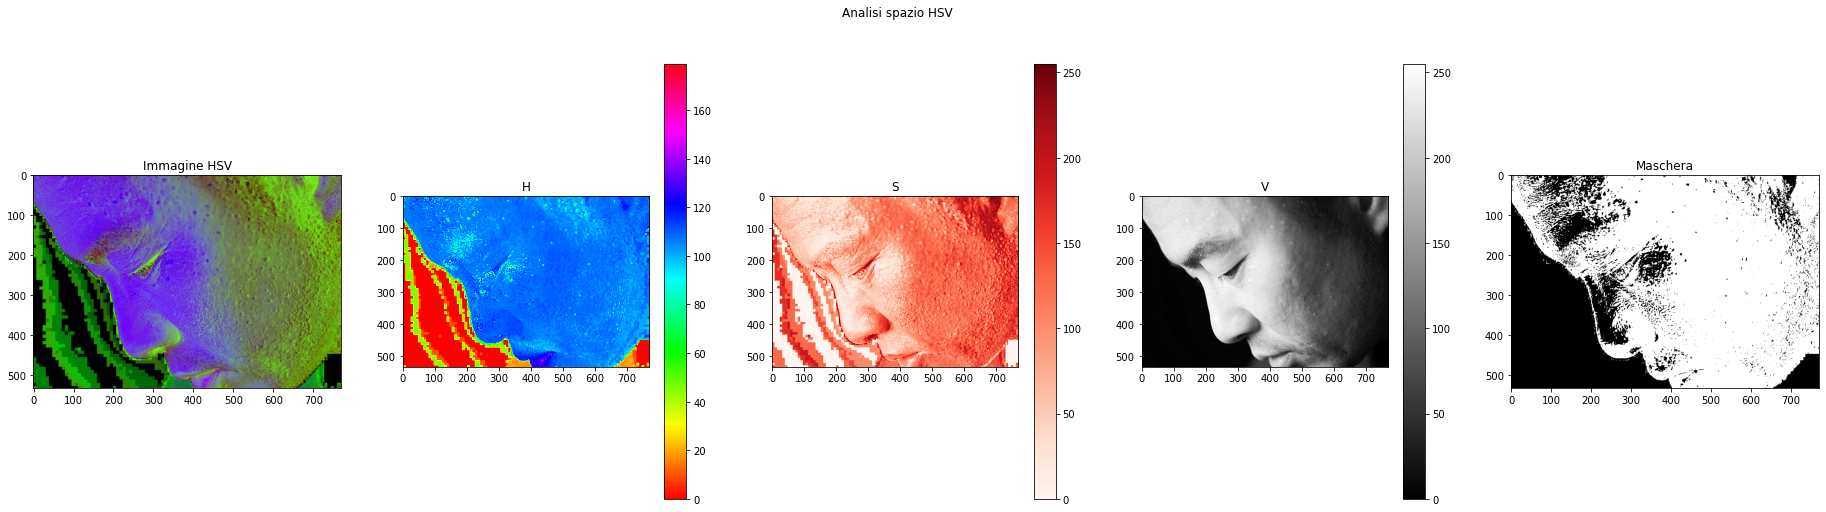

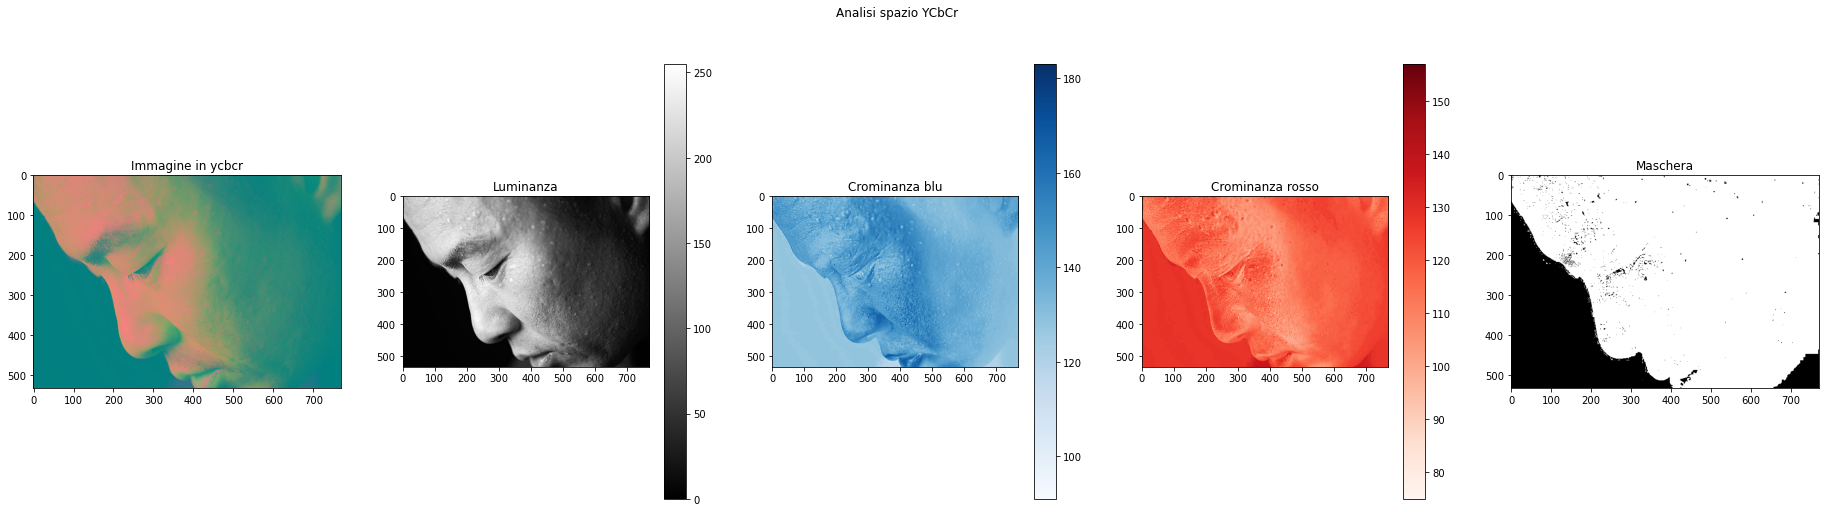

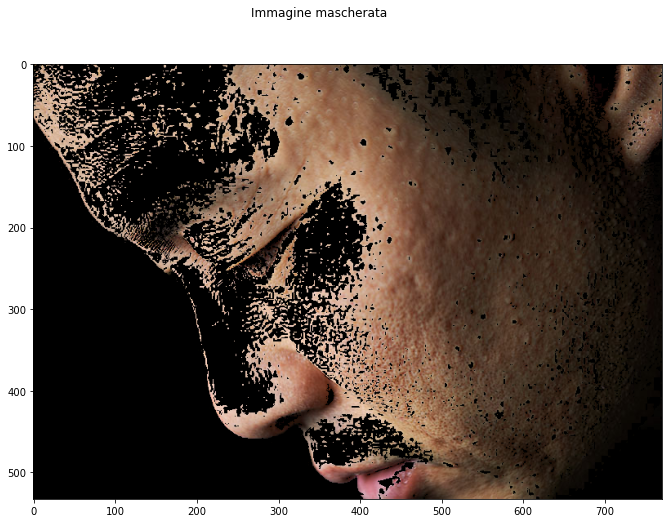

In [54]:
run_analysis('/manSweatingCloseup.jpg')

Salta subito all'occhio come le zone più problematiche per l'immagine siano quelle ad alta illuminazione (bassa saturazione, basso rapporto R/G) e le goccioline di sudore che, avendo caratteristiche diverse dalla pelle per quando riguarda la "reazione" alla luce, si spostano fuori soglia.

Proviamo ora ad analizzare l'immagine della Gioconda.

<ipython-input-45-aeab4922a2cb>:10: RuntimeWarning: divide by zero encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
<ipython-input-45-aeab4922a2cb>:10: RuntimeWarning: invalid value encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
<ipython-input-45-aeab4922a2cb>:11: RuntimeWarning: divide by zero encountered in true_divide
  mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1.01, 100)


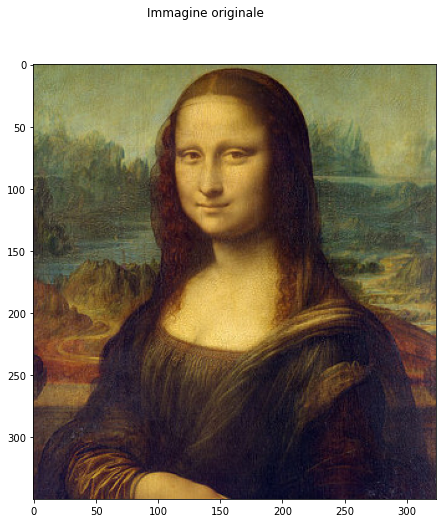

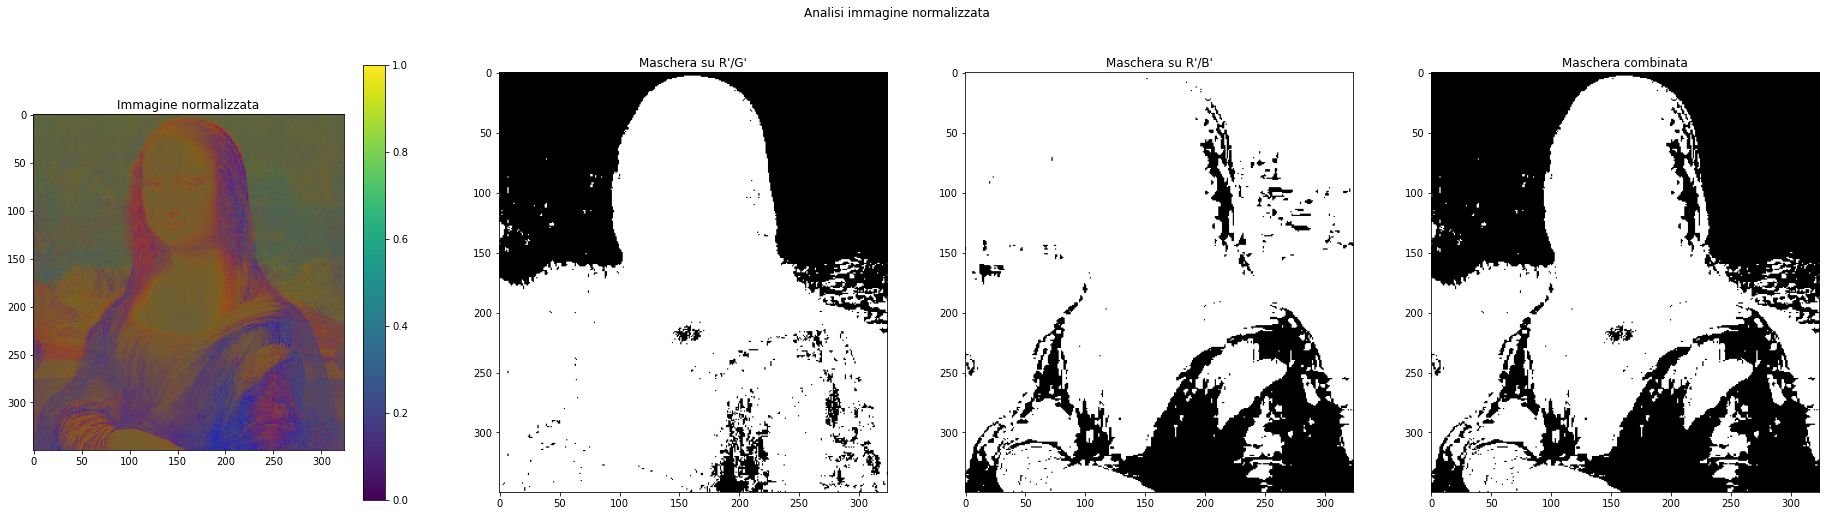

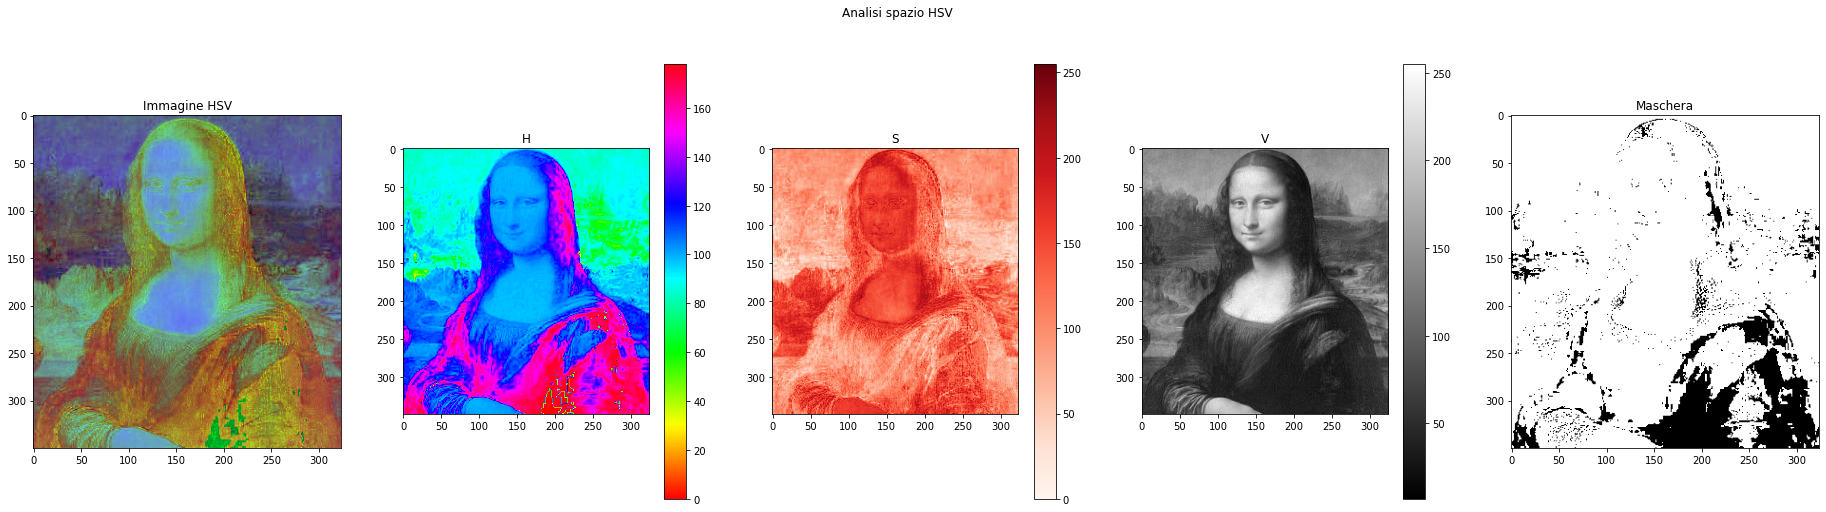

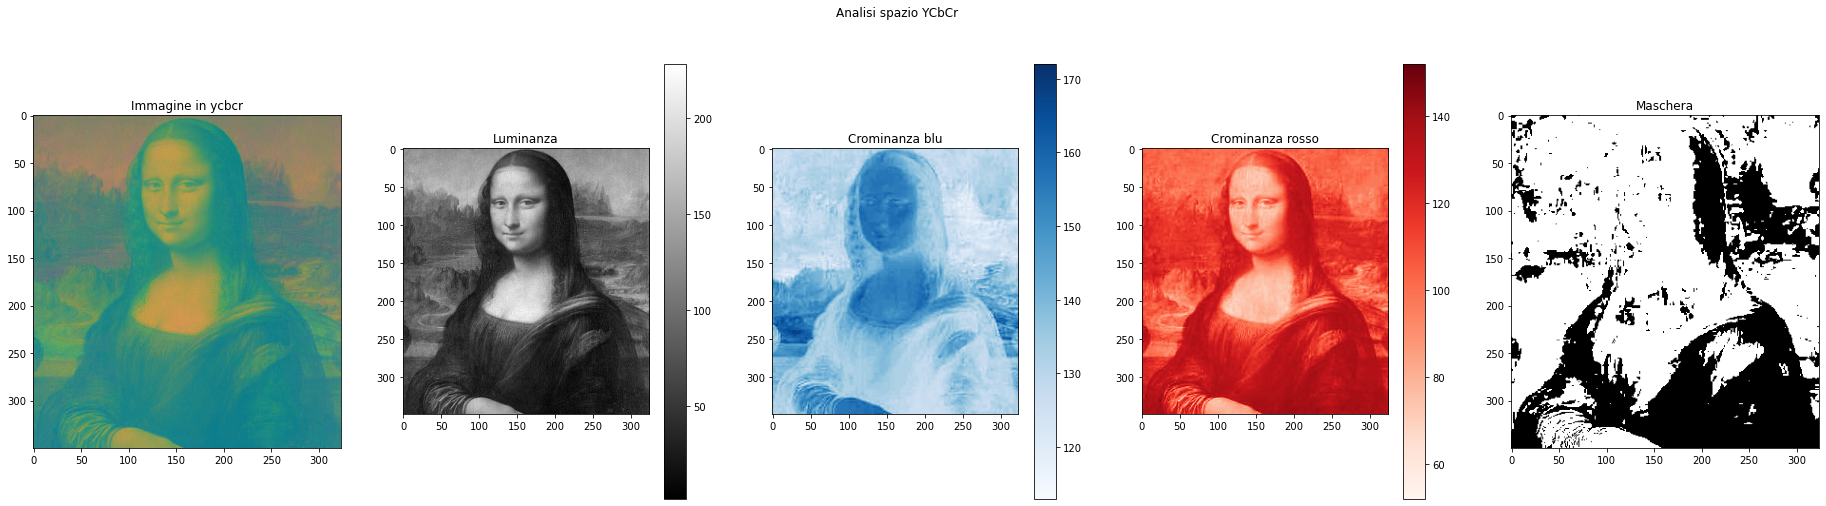

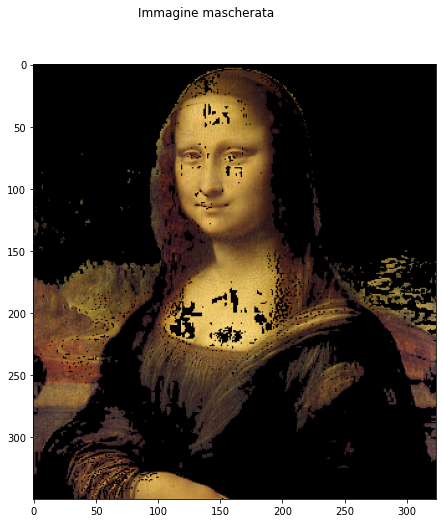

In [55]:
run_analysis("/gioconda.jpg")

Ad essere onesto, si tratta di un risultato migliore di quanto mi aspettassi.
Non essendo una foto di una persona "reale", ma un ritratto, non dovrebbe condividere tutte le caratteristiche delle foto della pelle.
Invece, nonostante ci siano problemi col background e coi vestiti, che stavolta sarebbero specificatamente risolvibili per questo immagine aggiungendo una sogliatura sulla luminosità, riusciamo ad individuare la pelle rappresentata nel dipinto.

Vediamo, infine, come si comporta l'algoritmo su immagini di bassa qualità

<ipython-input-43-7ade38f1b7b3>:10: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,0]=r/sum
<ipython-input-43-7ade38f1b7b3>:11: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,1]=g/sum
<ipython-input-43-7ade38f1b7b3>:12: RuntimeWarning: invalid value encountered in true_divide
  norm[:,:,2]=b/sum
<ipython-input-45-aeab4922a2cb>:10: RuntimeWarning: divide by zero encountered in true_divide
  mask_rg = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,1], 1.15, 100)
<ipython-input-45-aeab4922a2cb>:11: RuntimeWarning: divide by zero encountered in true_divide
  mask_rb = cv.inRange(img_array_norm[:, :, 0]/img_array_norm[:,:,2], 1.01, 100)


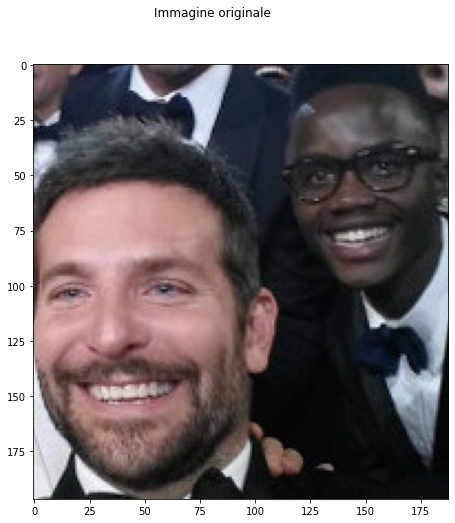

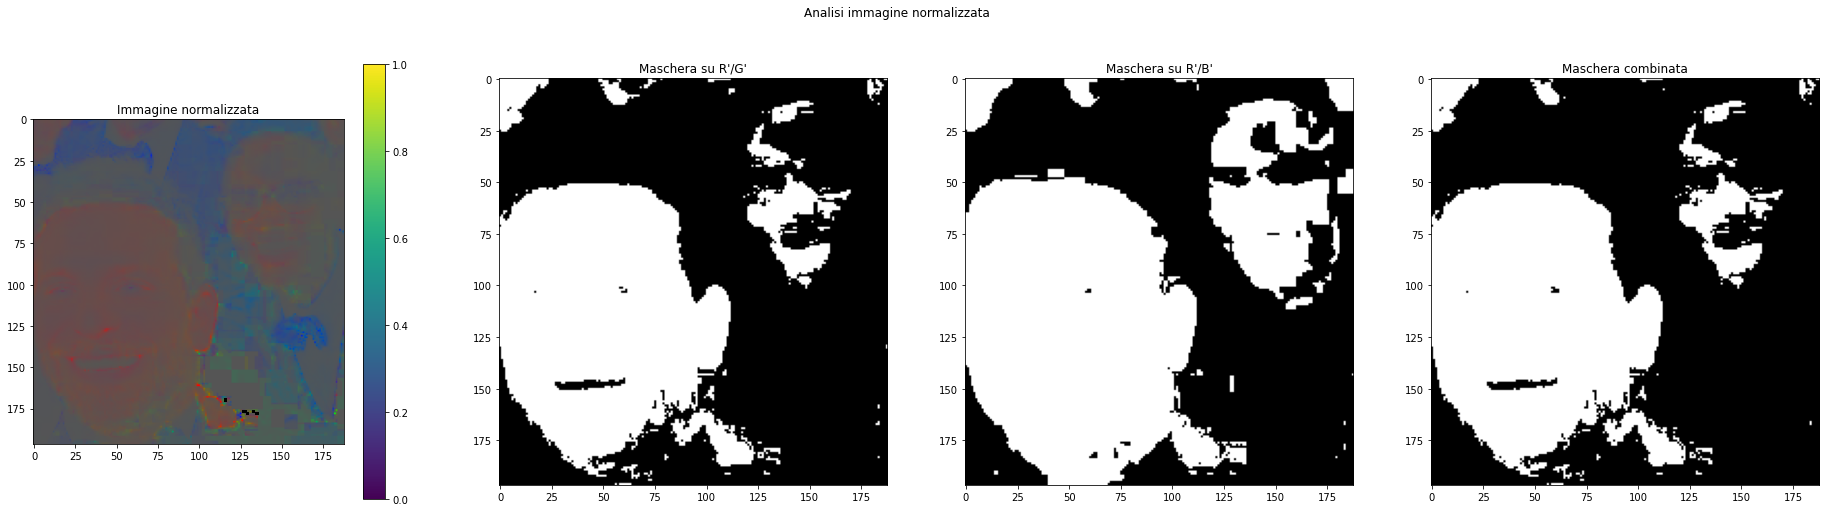

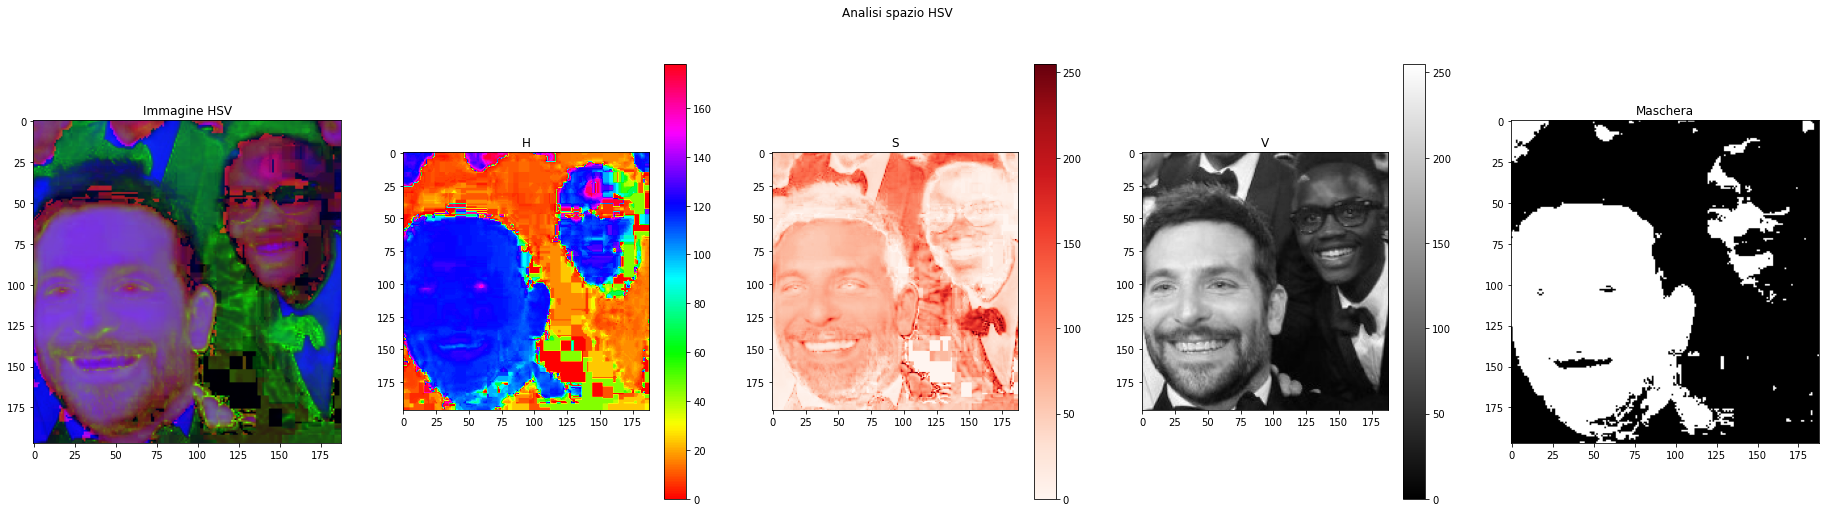

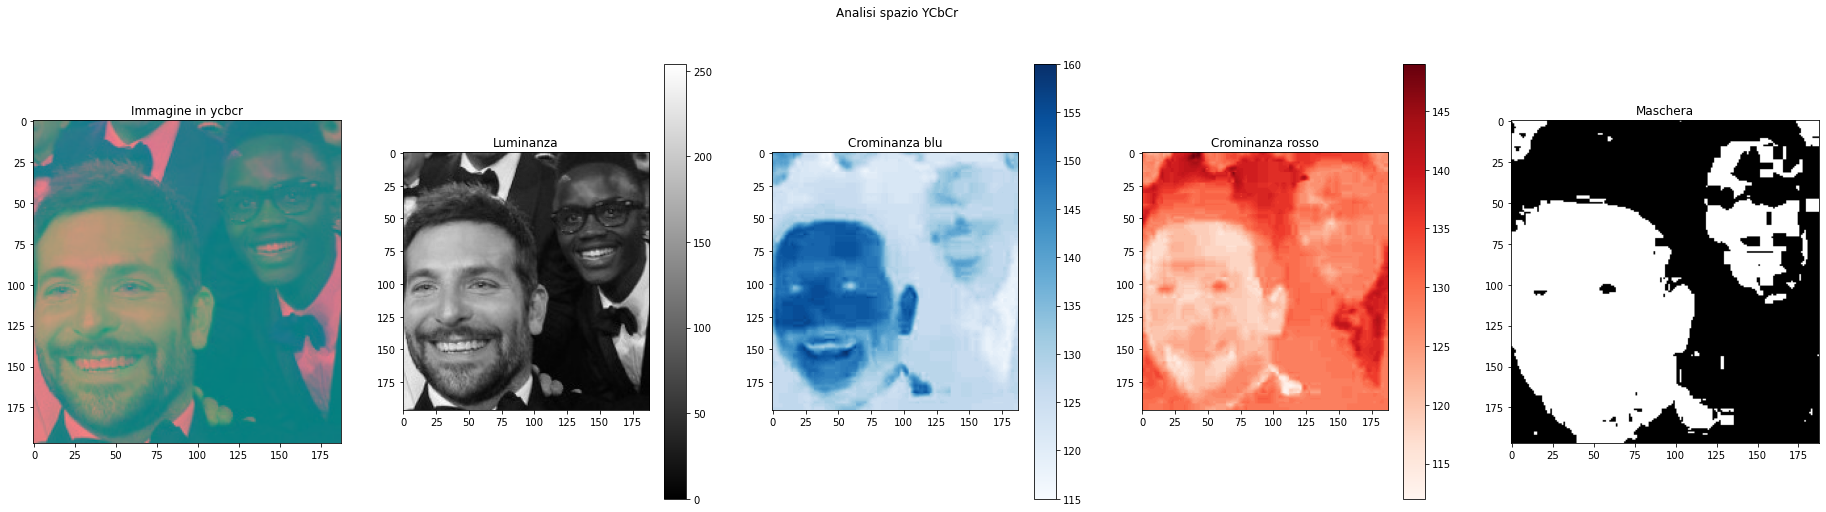

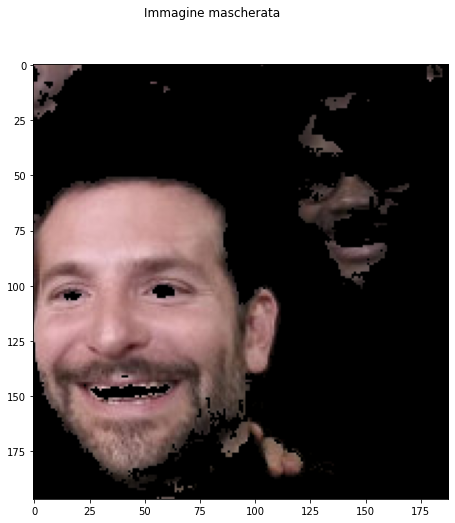

In [56]:
run_analysis("/BC.jpeg")

Il risultato è abbastanza disastroso.
Falliamo completamente nell'individuare una persona di colore.
Ma il problema non è tanto da ricercarsi nei valori di soglia, che funzionano perfettamente nella seconda immagine, quanto nella bassissima qualità della foto, che porta ad avere problemi di "stabilità" nei valori dell'immagine e nella conversione della stessa verso altri canali di colore

In [57]:
#run_skin_analysis_ycbcr()

In [58]:
#run_skin_analysis_hsv()

In [59]:
#run_skin_analysis_norm()

## Conclusioni

## Fonti

[Paper di riferimento (DOI: 10.1109/ICCOINS.2016.7783247)](https://ieeexplore.ieee.org/document/7783247)